In [1]:
import glob
import pandas as pd
import cv2
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


# 处理图片文件夹和标签

In [2]:
data = []
dir = "E:/MLDataset/Classify/AID/AID/"
labels = sorted(os.listdir(dir))
for i in labels:
    for j in os.listdir(os.path.join(dir,i)):
        data.append([f"{i}/{j}",i])
data = pd.DataFrame(data=data,columns=["path","label"])
print(data.head())
data.to_csv("data/data.csv",index=False,sep="\t")

                      path    label
0    Airport/airport_1.jpg  Airport
1   Airport/airport_10.jpg  Airport
2  Airport/airport_100.jpg  Airport
3  Airport/airport_101.jpg  Airport
4  Airport/airport_102.jpg  Airport


In [3]:
Counter(data.label)

Counter({'Airport': 360,
         'BareLand': 310,
         'BaseballField': 220,
         'Beach': 400,
         'Bridge': 360,
         'Center': 260,
         'Church': 240,
         'Commercial': 350,
         'DenseResidential': 410,
         'Desert': 300,
         'Farmland': 370,
         'Forest': 250,
         'Industrial': 390,
         'Meadow': 280,
         'MediumResidential': 290,
         'Mountain': 340,
         'Park': 350,
         'Parking': 390,
         'Playground': 370,
         'Pond': 420,
         'Port': 380,
         'RailwayStation': 260,
         'Resort': 290,
         'River': 410,
         'School': 300,
         'SparseResidential': 300,
         'Square': 330,
         'Stadium': 290,
         'StorageTanks': 360,
         'Viaduct': 420})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    10000 non-null  object
 1   label   10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


## 样例

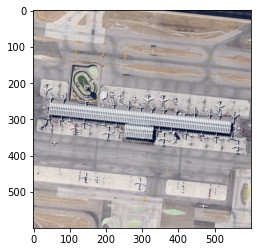

In [5]:
def load_image(path):
    image = cv2.imread(dir+path)
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(load_image(data.path[0]))

# 分析

Pond                 420
Viaduct              420
DenseResidential     410
River                410
Beach                400
Industrial           390
Parking              390
Port                 380
Farmland             370
Playground           370
Airport              360
Bridge               360
StorageTanks         360
Park                 350
Commercial           350
Mountain             340
Square               330
BareLand             310
Desert               300
School               300
SparseResidential    300
Resort               290
MediumResidential    290
Stadium              290
Meadow               280
Center               260
RailwayStation       260
Forest               250
Church               240
BaseballField        220
Name: label, dtype: int64


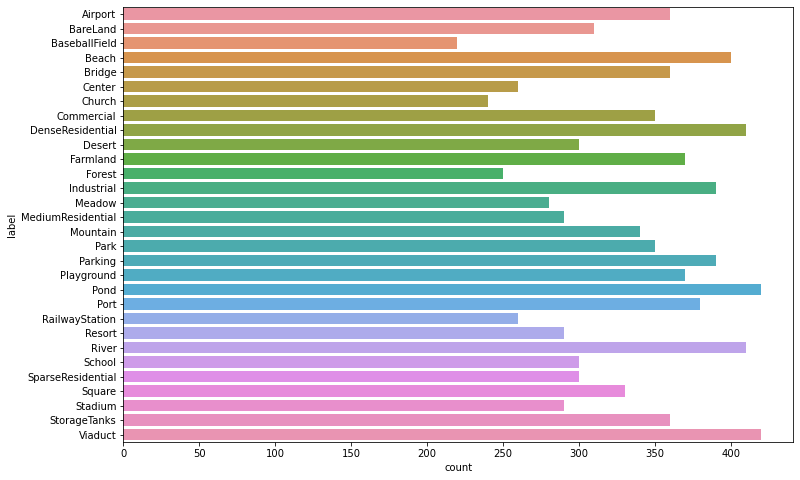

In [6]:
plt.figure("",figsize=(12,8))
print(data.label.value_counts())
sns.countplot(y="label",data=data,orient='v')

# 各类可视化

In [7]:
labels

['Airport',
 'BareLand',
 'BaseballField',
 'Beach',
 'Bridge',
 'Center',
 'Church',
 'Commercial',
 'DenseResidential',
 'Desert',
 'Farmland',
 'Forest',
 'Industrial',
 'Meadow',
 'MediumResidential',
 'Mountain',
 'Park',
 'Parking',
 'Playground',
 'Pond',
 'Port',
 'RailwayStation',
 'Resort',
 'River',
 'School',
 'SparseResidential',
 'Square',
 'Stadium',
 'StorageTanks',
 'Viaduct']

In [8]:
# num = 4
# for i in labels:
#     a = data[data.label==i]
#     a = a.sample(n=num)
#     fig,ax = plt.subplots(1,num,sharex=True,sharey=True,figsize=(15,6))
#     ax = ax.flatten()
#     for j in range(num):
#         ax[j].imshow(load_image(a.iloc[j,0]))
#         ax[j].set_title(f"{os.path.split(a.iloc[j, 0])[-1]},{i}")
#     plt.tight_layout()

# 拆分训练集和测试集

In [9]:
split = int(len(data)*0.8)
data = data.sample(frac=1,random_state=2020) #打乱
data[:split].to_csv("data/train.csv",index=False,sep="\t")
data[split:].to_csv("data/val.csv",index=False,sep="\t")

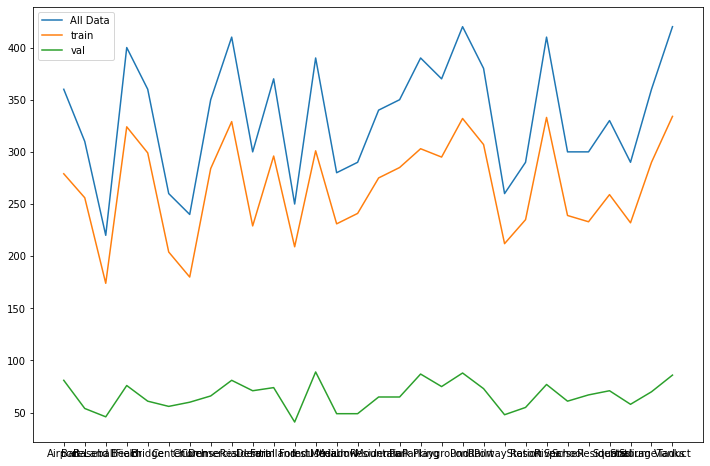

In [10]:
plt.figure("",figsize=(12,8))
co3 = Counter(data.label)
sns.lineplot(x=list(co3.keys()),y = list(co3.values()),label="All Data")

co = Counter(data[:split].label)
sns.lineplot(x=list(co.keys()),y = list(co.values()),label="train")
co2 = Counter(data[split:].label)
sns.lineplot(x=list(co2.keys()),y = list(co2.values()),label="val")